### Example implementations

In [54]:
%matplotlib ipympl
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets

In [55]:
def f(x, y):
    """
    Objective function 8the Ackley function)
    """
    a = 20
    b = 0.2
    c = 2*np.pi
    term_1 = np.exp((-b * np.sqrt(0.5 * (x ** 2 + y ** 2))))
    term_2 = np.exp((np.cos(c * x) + np.cos(c * y)) / 2)
    return -1 * a * term_1 - term_2 + a + np.exp(1)


Following code is largely based on the example code written in https://machinelearningmastery.com/a-gentle-introduction-to-particle-swarm-optimization/

Visualising the function:

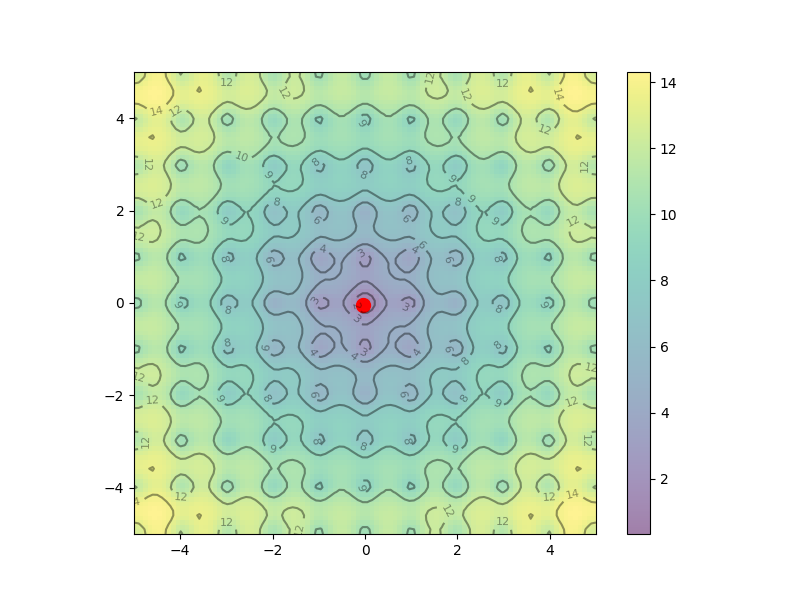

In [56]:
#2D contour plot with Minimum shown as a red dot

low_b, upper_b = -5, 5 #lower and upper boundary of search space

x = np.linspace(low_b, upper_b, 100)
y = np.linspace(low_b, upper_b,100)
X, Y = np.meshgrid(x, y) #np.meshgrid: takes two 1D arrays and returns 2 2D matrices that together represent all possible coordinate pairs
Z = f(X, Y)
X_min = X.ravel()[Z.argmin()]
Y_min = Y.ravel()[Z.argmin()]


plt.figure(figsize=(8,6))
plt.imshow(Z, extent=[low_b, upper_b, low_b, upper_b], origin='lower', cmap='viridis', alpha=0.5)
plt.colorbar()
plt.plot([X_min], [Y_min], marker='o', markersize=10, color="red")
contours = plt.contour(X, Y, Z, 10, colors='black', alpha=0.4)
plt.clabel(contours, inline=True, fontsize=8, fmt="%.0f")
plt.show()


PSO algorithm:

In [57]:

#Create 20 particles with random locations and random velocities
population_size = 20
pos = np.random.uniform(low_b, upper_b, size = (2, population_size))
vel = np.random.randn(2, population_size) * 0.1 #random samples from a normal distribution(mean 0, standard dev 1) here with standard dev of 0.1

#Initialize
pbest = pos #Particles have not changed, so pbest is their initial position
pbest_obj = f(pos[0], pos[1]) 
gbest_obj = pbest_obj.min() #the minimum value (gotten from the best swarm position)
gbest = pbest[:, pbest_obj.argmin()] #the best position of the swarm

In [58]:


personal_c = social_c = 2.0
w = 0.8 #inertial weight
max_iter = 100
i = 0
all_updates = []

while i < max_iter:
    
    all_updates.append([vel.copy(), pos.copy(), pbest.copy(), gbest.copy()])
    
    personal_r, social_r = np.random.rand(2) #random numbers between 0 and 1 to introduce stochasticity when updating the pos and vel

    #update velocity and position
    personal_term = personal_c*personal_r*(pbest -pos) 
    social_term = social_c*social_r*(gbest.reshape(-1, 1) - pos)
    vel = w*vel + personal_term + social_term
    pos = pos + vel

    #ensures the positions don't exceed the search space bounds by replacing any exceeding values with the bound values
    pos = np.minimum(pos, upper_b) 
    pos = np.maximum(pos, low_b)

    current_obj = f(pos[0], pos[1]) 
    #updates the pbest positions with the current positions wherever the current obj is better/equal than to the pbest_obj.
    pbest[:, (pbest_obj >= current_obj)] = pos[:, (pbest_obj >= current_obj)] 

    #compares best objectives and current objectives and updates it to whichever is best (smaller)
    pbest_obj = np.array([pbest_obj, current_obj]).min(axis=0) 
    gbest_obj = pbest_obj.min()
    gbest = pbest[:, pbest_obj.argmin()]

    i += 1





interactive(children=(IntSlider(value=0, description='i', max=99), Output()), _dom_classes=('widget-interact',…

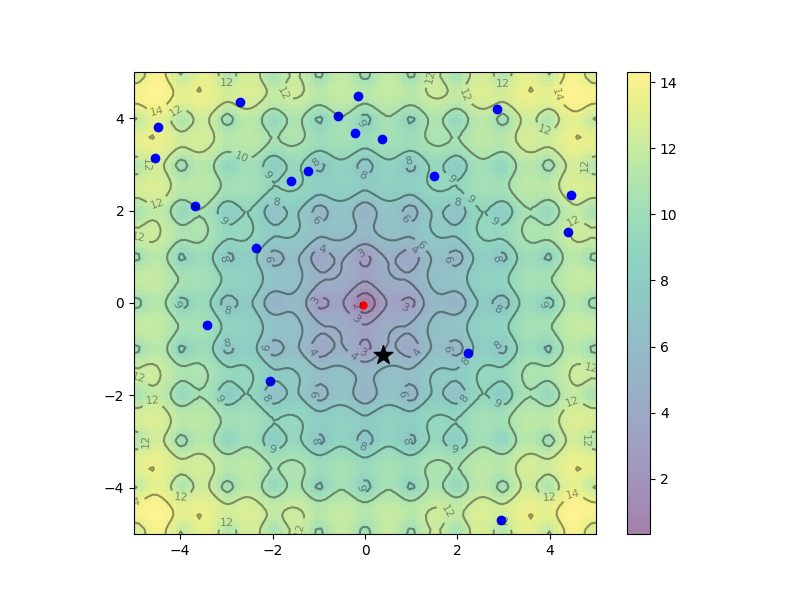

In [59]:
#Initialise the contour plot and include initial values
fig, ax = plt.subplots(figsize=(8,6))
im = ax.imshow(Z, extent=[low_b, upper_b, low_b, upper_b], origin='lower', cmap='viridis', alpha=0.5)
fig.colorbar(im, ax=ax)
ax.plot([X_min], [Y_min], marker='o', markersize=5, color="red")
contours = ax.contour(X, Y, Z, 10, colors='black', alpha=0.4)
ax.clabel(contours, inline=True, fontsize=8, fmt="%.0f")

vel, pos, pbest, gbest = all_updates[0]

particles_plot = ax.scatter(pos[0], pos[1], marker='o', color='blue')
gbest_plot = plt.scatter([gbest[0]], [gbest[1]], marker='*', s=200, color='black')
#pbest_plot = ax.scatter(pbest[0], pbest[1], marker='o', color='black')
# arrows_plot = ax.quiver(pos[0], pos[1], vel[0], vel[1], color='blue', width=0.005, angles='xy', scale_units='xy', scale=1) #quiver method used to draw vectors (arrows)

ax.set_xlim([low_b, upper_b])
ax.set_ylim([low_b, upper_b])


def update(i): 

    vel, pos, pbest, gbest = all_updates[i]

    particles_plot.set_offsets(pos.T)
    gbest_plot.set_offsets(gbest.reshape(1,-1))
    #pbest_plot.set_offsets(pbest.T) #set_offsets is needed to update scatter plots
    # arrows_plot.set_offsets(pos.T) #for quiver method, set_offset needed to update positions and set_UVC to update vector directions/magn
    # arrows_plot.set_UVC(vel[0], vel[1])
    fig.canvas.draw()


widgets.interact(update, i =widgets.IntSlider(
    value=0,  max=max_iter-1, step=1));




#### Same problem but using the PySwarm module

need to: pip install pyswarms 

In [68]:
import pyswarms as ps

#PySwarm objective function can only have one argument, so rewrite:
def f(p):
    """
    Objective function 8the Ackley function)
    """

    x = p[:, 0]
    y = p[:, 1]
    a = 20
    b = 0.2
    c = 2*np.pi
    term_1 = np.exp((-b * np.sqrt(0.5 * (x ** 2 + y ** 2))))
    term_2 = np.exp((np.cos(c * x) + np.cos(c * y)) / 2)
    return -1 * a * term_1 - term_2 + a + np.exp(1)

options = {
    'c1': 0.5,  
    'c2': 0.3,  
    'w': 0.9    
}

optimizer = ps.single.GlobalBestPSO(n_particles=20, 
                                    dimensions=2,   
                                    options=options)

val, pos = optimizer.optimize(f, iters=100)
pos



2024-11-07 00:42:28,278 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}
pyswarms.single.global_best: 100%|██████████|100/100, best_cost=0.000914
2024-11-07 00:42:28,465 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 0.0009144740975526311, best pos: [ 0.00019446 -0.00025708]


array([ 0.00019446, -0.00025708])